#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/NO 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 => 성능에 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 파라마터 존재!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==> 단! 여러개의 DT라 모이면 성능 강해짐
	*앙상블에 주로 사용됨

[1] 모듈로딩 및 데이터 준비

In [113]:
# 모듈로딩

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [114]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF: {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}D')

featureDF: (150, 4), 2D
targetSR: (150,), 1D


[2] 학습용 데이터셋 준비

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [116]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

In [117]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D')

print(f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

X_train: (112, 4), 2D
X_test: (38, 4), 2D
y_train: (112,), 1D
y_test: (38,), 1D


[3] 학습 - 기본 학습

In [118]:
# 모델 인스턴스
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [119]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개') #아무값도 안주었기 때문에 원래 피쳐 갯수 전부인 4개 
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}개')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')


[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 4개
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']개
[dt_model.feature_importances_] [0.05727497 0.         0.06844775 0.87427728]


피쳐 선택시 트리 돌려서 주요 피쳐 알아냄

- 성능 체크


In [120]:
# 학습용 데이터셋에 대한 성능
train_score=dt_model.score(X_train, y_train)

# 테스트 데이터셋에 대한 성능
test_score=dt_model.score(X_test, y_test)

In [121]:
print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 1.0, test_score : 0.9736842105263158


[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [122]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [123]:
# 교차 검증 준비 => 모델 인스턴스, trainDS, cv=5 (기본값)
dt_model2 = DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2,X_train, y_train,
               return_train_score=True, 
               return_estimator=True)

In [124]:
# dict => DataFrame
resultDF=pd.DataFrame(result)

In [125]:
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.003987,0.000999,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.001991,0.000996,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.000996,0.000997,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.001993,0.001000,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.000996,0.001989,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==>  하이터 파라미터 Hyper-parameter 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf, ... => 많음

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
# 하이퍼파라미터 dict 생성
params= {'max_depth':[4,3,2,1],
         'min_samples_leaf':[7,6,5]}

In [128]:
gscv=GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [7, 6, 5]},
             return_train_score=True)

In [129]:
# 모델 파라미터
print(f'[gscv.best_params]       {gscv.best_params_}')
print(f'[gscv.best_score_]      {gscv.best_score_}')
print(f'[gscv.best_estimator_]  {gscv.best_estimator_}')
print(f'[gscv.cv_results_] \n {gscv.cv_results_}')

cv_resultDF=pd.DataFrame(gscv.cv_results_)

[gscv.best_params]       {'max_depth': 4, 'min_samples_leaf': 7}
[gscv.best_score_]      0.9284584980237154
[gscv.best_estimator_]  DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)
[gscv.cv_results_] 
 {'mean_fit_time': array([0.00150785, 0.00119581, 0.00106044, 0.00106091, 0.00130472,
       0.00129952, 0.00154767, 0.0013402 , 0.00120678, 0.00099998,
       0.00096865, 0.00138683]), 'std_fit_time': array([6.28517566e-04, 3.98683619e-04, 5.85342424e-05, 6.71997727e-05,
       3.99838935e-04, 4.34996004e-04, 4.62017771e-04, 4.11084005e-04,
       3.89551228e-04, 5.40195682e-06, 3.18009275e-05, 4.91323192e-04]), 'mean_score_time': array([0.00104446, 0.00099683, 0.00124483, 0.00101056, 0.00081248,
       0.00064988, 0.00082116, 0.00064893, 0.00082617, 0.00099597,
       0.0010149 , 0.00060701]), 'std_score_time': array([9.58683923e-05, 6.30600258e-04, 4.62985490e-04, 3.29190361e-06,
       4.06305340e-04, 5.30633045e-04, 4.11321303e-04, 5.29852610e-04,
       4.14330373e-04, 1.2046

In [130]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [131]:
cv_resultDF[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,"{'max_depth': 4, 'min_samples_leaf': 7}",0.928458,0.950886
1,"{'max_depth': 4, 'min_samples_leaf': 6}",0.919368,0.955331
2,"{'max_depth': 4, 'min_samples_leaf': 5}",0.928458,0.953109
3,"{'max_depth': 3, 'min_samples_leaf': 7}",0.928458,0.950886
4,"{'max_depth': 3, 'min_samples_leaf': 6}",0.919368,0.950886
5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.928458,0.953109
6,"{'max_depth': 2, 'min_samples_leaf': 7}",0.928458,0.950886
7,"{'max_depth': 2, 'min_samples_leaf': 6}",0.928458,0.950886
8,"{'max_depth': 2, 'min_samples_leaf': 5}",0.928458,0.950886
9,"{'max_depth': 1, 'min_samples_leaf': 7}",0.651779,0.674107


In [132]:
diffscoreDF=cv_resultDF[['mean_test_score','mean_train_score']].copy()
diffscoreDF['diff']=cv_resultDF['mean_train_score']-cv_resultDF['mean_test_score']

In [133]:
cv_resultDF[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,"{'max_depth': 4, 'min_samples_leaf': 7}",0.928458,0.950886
1,"{'max_depth': 4, 'min_samples_leaf': 6}",0.919368,0.955331
2,"{'max_depth': 4, 'min_samples_leaf': 5}",0.928458,0.953109
3,"{'max_depth': 3, 'min_samples_leaf': 7}",0.928458,0.950886
4,"{'max_depth': 3, 'min_samples_leaf': 6}",0.919368,0.950886
5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.928458,0.953109
6,"{'max_depth': 2, 'min_samples_leaf': 7}",0.928458,0.950886
7,"{'max_depth': 2, 'min_samples_leaf': 6}",0.928458,0.950886
8,"{'max_depth': 2, 'min_samples_leaf': 5}",0.928458,0.950886
9,"{'max_depth': 1, 'min_samples_leaf': 7}",0.651779,0.674107


- 주요 피쳐 시각화

In [134]:
## 가장 좋은 모델
best_model=gscv.best_estimator_
print(f'best_model.max_depth : {best_model.max_depth}')
print(f'best_model.min_samples_leaf : {best_model.min_samples_leaf}')


best_model.max_depth : 4
best_model.min_samples_leaf : 7


In [135]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_, best_model.feature_names_in_

(array([0.00669645, 0.        , 0.60241733, 0.39088622]),
 4,
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

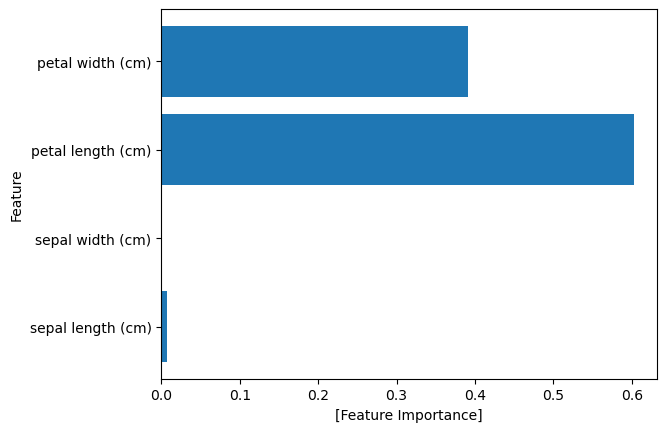

In [136]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

In [137]:
from sklearn.tree import export_graphviz

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [139]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names,impurity=True,filled=True)

- DT 그래프 시각화
	* Graphviz

In [140]:
## (1) DT모델을 dot포맷으 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz

export_graphviz(best_model,out_file='tree.dot',
                class_names=['setosa','versicolor','verginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True,rounded=True)

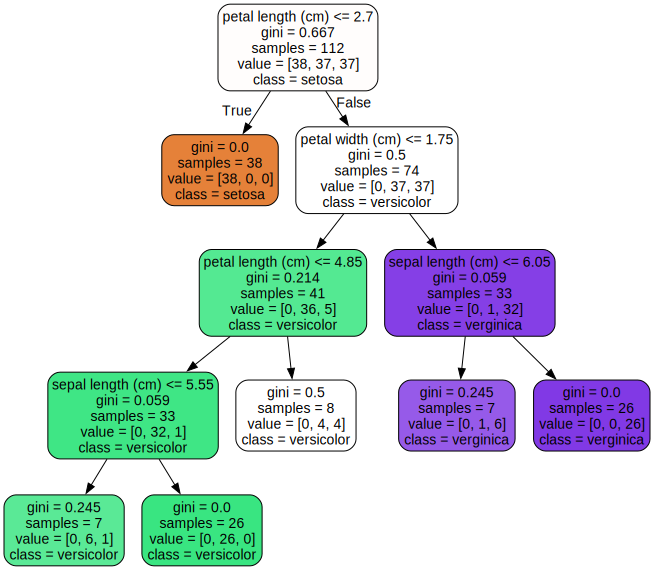

In [141]:
## (2) dot 파일 출력
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[6] 새로운 데이터 예측


In [144]:
new_data=featureDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [146]:
best_model.predict(new_data)

array([0])

In [147]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])